# Parmcheck Penalty Score Check

In [3]:
import os
import sys
import re
import matplotlib.pyplot as plt

In [4]:
def check_parmchk2(file):
    """Checking of parmchk2-created file for atomtype assignment, 
    see https://docs.bioexcel.eu/2020_06_09_online_ambertools4cp2k/04-parameters/index.html for more info
        --> if “ATTN: needs revision” is found in file, the atomtype assignment failed

    Args:
        file (_string_): Inputfile name

    Returns:
        _bool_: True if parmchk2 file is ok, False if it calls for revision of antechamber file
    """
    pen_list = list()
    with open(file) as infile:
        lines = infile.read().splitlines()
        for line in lines:
            if "penalty score" in line:
                penalty_score_str = line.split("penalty score")[1].strip().split("=")[1].strip()
                penalty_score = float(re.search(r"\d+\.?\d*", penalty_score_str).group())
                print(line)
                print(penalty_score)
                pen_list.append(penalty_score)
    if (len(pen_list))==0:
        pen_list.append(0.0)
    # get max of pen_list
    max_penalty = max(pen_list)
    return pen_list, max_penalty

In [5]:
def plot_penalties(mol_pen_dict):
    # caluclate avg and max scores 
    avg_scores = []
    avg_scores_cleaned = []
    max_scores = []
    for scores in mol_pen_dict.values():
        non_zero_scores = sum(1 for score in scores if score != 0)
        print(scores)
        if scores:
            avg_scores.append(sum(scores) / len(scores))
            max_scores.append(max(scores))
            if non_zero_scores == 0:
                avg_scores_cleaned.append(0)
            else:
                avg_scores_cleaned.append(sum(scores)/non_zero_scores)

        else:
            avg_scores.append(0)
            max_scores.append(0)
    
    # Plot average scores
    """  plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(avg_scores) + 1), avg_scores, marker='o')
    plt.title('Average Penalty Scores')
    plt.xlabel('File Number')
    plt.ylabel('Average Penalty Score')
    plt.show() """
    
    # Plot cleaned average scores
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(avg_scores_cleaned) + 1), avg_scores_cleaned, marker='o')
    plt.title('Average Cleaned Penalty Scores')
    plt.xlabel('File Number')
    plt.ylabel('Average Cleaned Penalty Score')
    plt.show()
    
    # Plot max scores
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(max_scores) + 1), max_scores, marker='o')
    plt.title('Max Penalty Scores')
    plt.xlabel('File Number')
    plt.ylabel('Max Penalty Score')
    plt.show()
    
    # Plot histogram of average scores
    plt.figure(figsize=(10, 5))
    plt.hist(avg_scores_cleaned, bins=20, edgecolor='black')
    plt.title('Histogram of Average Penalty Scores')
    plt.xlabel('Average Penalty Score')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot histogram of max scores
    plt.figure(figsize=(10, 5))
    plt.hist(max_scores, bins=20, edgecolor='black')
    plt.title('Histogram of Max Penalty Scores')
    plt.xlabel('Max Penalty Score')
    plt.ylabel('Frequency')
    plt.show()

# Main

In [6]:
folder = "./delaney_mols_bccc0_gaff2_assigned"
mol_pen_dict = dict()
mol_maxpen_dict = dict()
for filename in os.listdir(folder):
    if filename.endswith("ass.frcmod"):
        file_path = os.path.join(folder, filename)
        print(file_path, filename)  # or do something with the file
        mol_pen_dict[filename],mol_maxpen_dict[filename]=check_parmchk2(file_path)




./delaney_mols_bccc0_gaff2_assigned/mol_0_ass.frcmod mol_0_ass.frcmod
ca-ca-ca-ha         1.1          180.0         2.0          Using general improper torsional angle  X- X-ca-ha, penalty score=  6.0)
6.0
./delaney_mols_bccc0_gaff2_assigned/mol_2_ass.frcmod mol_2_ass.frcmod
ca-ca-ca-ha         1.1          180.0         2.0          Using general improper torsional angle  X- X-ca-ha, penalty score=  6.0)
6.0
./delaney_mols_bccc0_gaff2_assigned/mol_3_ass.frcmod mol_3_ass.frcmod
ca-ca-ca-ha         1.1          180.0         2.0          Using general improper torsional angle  X- X-ca-ha, penalty score=  6.0)
6.0
./delaney_mols_bccc0_gaff2_assigned/mol_4_ass.frcmod mol_4_ass.frcmod
ca-ca-cd-cc   1    0.505       180.000           2.000      same as c2-ce-ca-ca, penalty score=229.0
229.0
ca-ca-cc-cd   1    0.505       180.000           2.000      same as c2-ce-ca-ca, penalty score=223.0
223.0
ca-ca-cd-ha   4    2.800       180.000           2.000      same as X -c2-ca-X , penalty score=

In [9]:
print(max(mol_maxpen_dict.values()))
print(len(mol_maxpen_dict))

709.0
93


[6.0]
[6.0]
[6.0]
[229.0, 223.0, 232.0, 232.0, 38.9, 38.9, 6.0]
[179.0, 266.0, 179.0, 179.0, 92.0, 179.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 44.3]
[6.0, 6.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 6.0, 67.2, 67.2]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 0.0, 324.0, 324.0, 0.0, 0.0, 324.0, 385.0, 136.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 136.0, 237.0, 324.0, 6.0, 6.0, 6.0, 44.3]
[6.0, 6.0]
[6.0, 46.8, 6.0]
[6.0, 6.0]
[6.0, 6.0]
[6.0]
[237.0, 324.0, 47.1, 46.8, 6.0]
[6.0, 6.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 6.0, 6.0, 6.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 6.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 49.6, 6.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

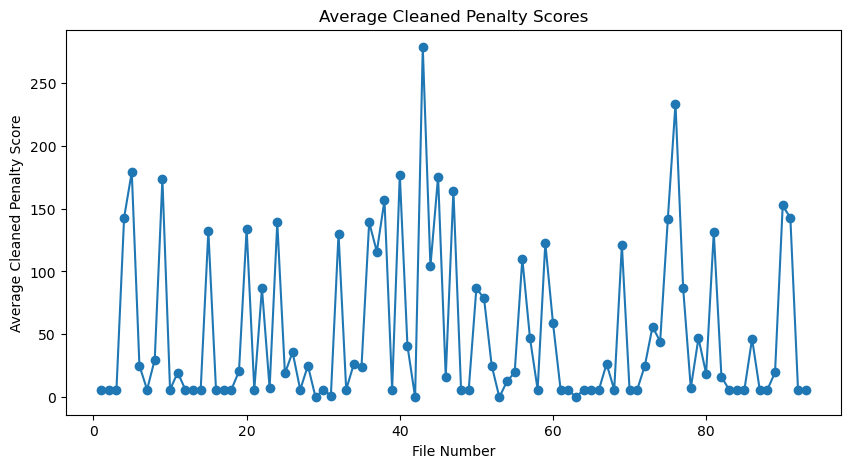

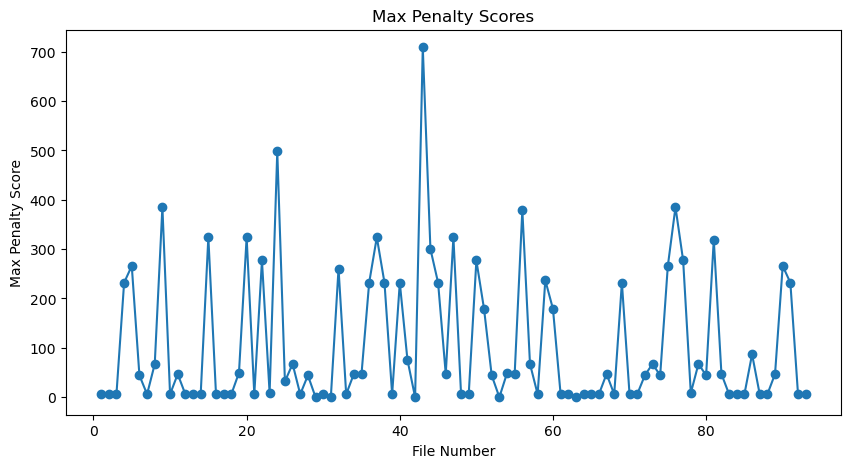

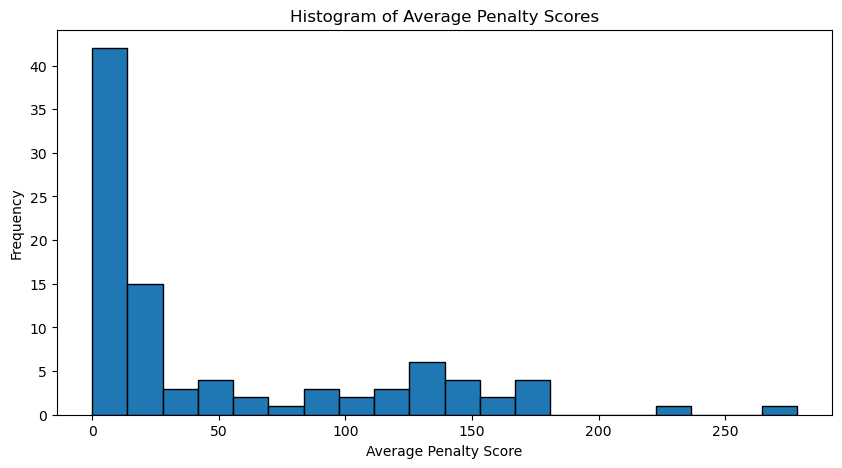

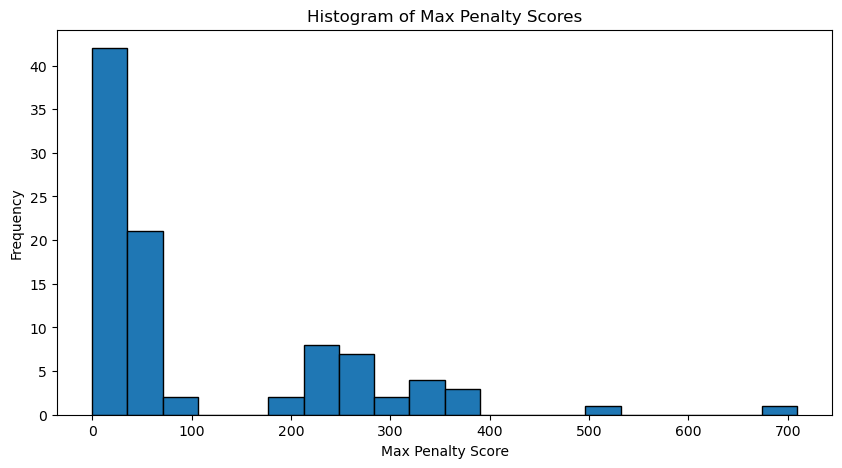

In [8]:
plot_penalties(mol_pen_dict)